# **VISSL**

VISSL  is a computer VIsion library for state-of-the-art Self-Supervised Learning research. This framework is based on PyTorch. The key idea of this library is to speed up the self-supervised learning process from handling a new design to the evaluation part, VISSL does it all. Following are the characteristic of VISSL framework:

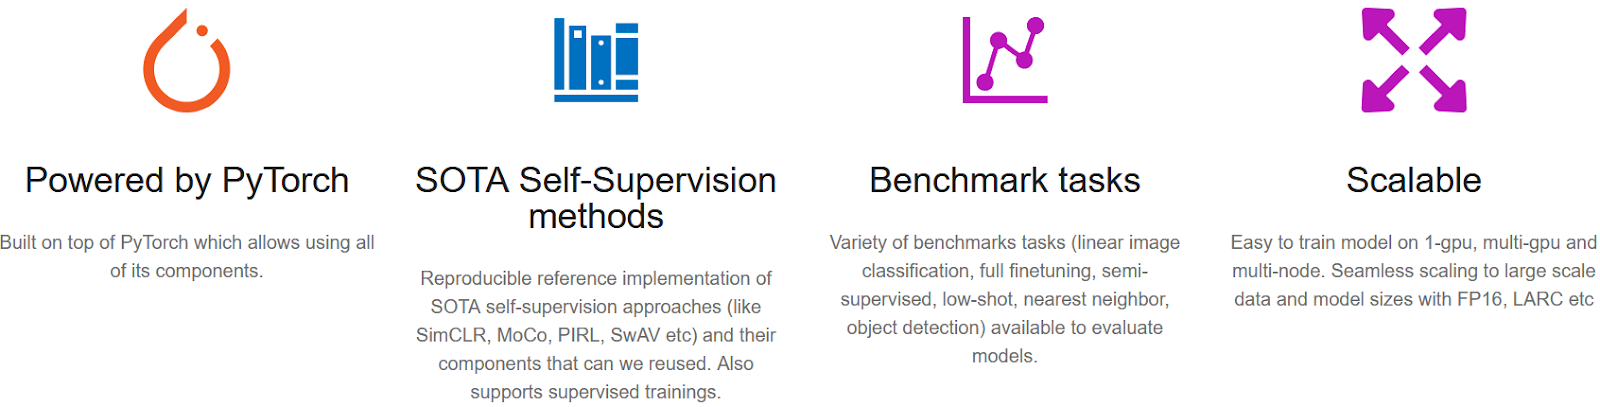

## **Implementation**

### **Install the dependencies.**

In [5]:
!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk gensim tensorflow keras \
    tqdm scikit-image pillow --user -q --no-warn-script-location

# Install: PyTorch (we assume 1.5.1 but VISSL works with all PyTorch versions >=1.4)
!python -m pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!python -m pip install apex -f https://dl.fbaipublicfiles.com/vissl/packaging/apexwheels/{version_str}/download.html

!python -m pip install git+"https://github.com/facebookresearch/vissl.git"

import IPython
IPython.Application.instance().kernel.do_shutdown(True)


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 16 kB/s              
     |████████████████████████████████| 6.6 MB 1.7 MB/s            
  Attempting uninstall: torch
    Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
Looking in links: https://dl.fbaipublicfiles.com/vissl/packaging/apexwheels/{version_str}/download.html
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 75 kB 3.9 MB/s             
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 709 kB 9.4 MB/s            
  Preparing metadata (setup.py) ... done
     |█████████

{'status': 'ok', 'restart': True}

In [ ]:
import sys
import torch
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{torch.__version__[0:5:2]}"
])
print(version_str)

Error: Session cannot generate requests

## **Quick Start with VISSL**

In [ ]:
import vissl
import tensorboard
import apex
import torch

Before getting started with the training part, let us discuss YAML config files provided by VISSL. VISSL uses Hydra for configuration management. All the YAML files provided by it are available [here](https://github.com/facebookresearch/vissl/tree/master/configs/config/pretrain/supervised). For this demo, we are going to use YAML config file for training ResNet-50 supervised model on 1-GPU, which can be downloaded from [here](https://github.com/facebookresearch/vissl/blob/master/configs/config/pretrain/supervised/supervised_1gpu_resnet_example.yaml) or,

In [ ]:
# !mkdir -p configs/config/
# !wget -O configs/__init__.py https://dl.fbaipublicfiles.com/vissl/tutorials/configs/__init__.py 
# !wget -O configs/config/supervised_1gpu_resnet_example.yaml https://dl.fbaipublicfiles.com/vissl/tutorials/configs/supervised_1gpu_resnet_example.yaml

For training purposes, VISSL provides a helper tool which can do the feature extraction and training on VISSL. This helper tool is made in such a way that it can do training on 1-GPU or multi-GPU and even provide a distributed environment for training. The file can be downloaded as:

In [ ]:
# !wget https://dl.fbaipublicfiles.com/vissl/tutorials/run_distributed_engines.py

In [ ]:
# !mkdir -p dummy_data/train/class1
# !mkdir -p dummy_data/train/class2
# !mkdir -p dummy_data/val/class1
# !mkdir -p dummy_data/val/class2

# # create 2 classes in train and add 5 images per class
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class1/img1.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class1/img2.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class1/img3.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class1/img4.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class1/img5.jpg

# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class2/img1.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class2/img2.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class2/img3.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class2/img4.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/train/class2/img5.jpg

# # create 2 classes in val and add 5 images per class
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class1/img1.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class1/img2.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class1/img3.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class1/img4.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class1/img5.jpg

# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class2/img1.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class2/img2.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class2/img3.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class2/img4.jpg
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O dummy_data/val/class2/img5.jpg


In [ ]:
#Now let's verify that the data is successfully downloaded:
!ls dummy_data/val/class1/
!ls dummy_data/train/class1/

Create a custom dataset for training ResNet-50, you can take an ImageNet dataset also. The code for it is available here. For using custom data with VISSL, we have to register it in VISSL(providing metadata and path to the dataset). For this, we create a simple JSON file with the metadata and save it to `configs/config/dataset_catalog.py` file.

In [ ]:
json_data = {
    "dummy_data_folder": {
      "train": [
        "/content/dummy_data/train", "/content/dummy_data/train"
      ],
      "val": [
        "/content/dummy_data/val", "/content/dummy_data/val"
      ]
    }
}
# use VISSL's api to save or you can use your custom code.
from vissl.utils.io import save_file
save_file(json_data, "./configs/config/dataset_catalog.json")

You can verify whether the dataset is registered with VISSL by following commands:

In [ ]:
from vissl.data.dataset_catalog import VisslDatasetCatalog

# list all the datasets that exist in catalog
print(VisslDatasetCatalog.list())

# get the metadata of dummy_data_folder dataset
print(VisslDatasetCatalog.get("dummy_data_folder"))

  Train the model by the following command.

In [ ]:
!python3 run_distributed_engines.py \
    hydra.verbose=true \
    config=supervised_1gpu_resnet_example \
    config.DATA.TRAIN.DATA_SOURCES=[disk_folder] \
    config.DATA.TRAIN.LABEL_SOURCES=[disk_folder] \
    config.DATA.TRAIN.DATASET_NAMES=[dummy_data_folder] \
    config.DATA.TRAIN.DATA_PATHS=[/content/dummy_data/train] \
    config.DATA.TRAIN.BATCHSIZE_PER_REPLICA=2 \
    config.DATA.TEST.DATA_SOURCES=[disk_folder] \
    config.DATA.TEST.LABEL_SOURCES=[disk_folder] \
    config.DATA.TEST.DATASET_NAMES=[dummy_data_folder] \
    config.DATA.TEST.DATA_PATHS=[/content/dummy_data/val] \
    config.DATA.TEST.BATCHSIZE_PER_REPLICA=2 \
    config.DISTRIBUTED.NUM_NODES=1 \
    config.DISTRIBUTED.NUM_PROC_PER_NODE=1 \
    config.OPTIMIZER.num_epochs=2 \
    config.OPTIMIZER.param_schedulers.lr.values=[0.01,0.001] \
    config.OPTIMIZER.param_schedulers.lr.milestones=[1] \
    config.TENSORBOARD_SETUP.USE_TENSORBOARD=true \
    config.CHECKPOINT.DIR="./checkpoints"

In [ ]:
ls checkpoints/

In [ ]:
# Look at training curves in tensorboard:
!kill 490
%reload_ext tensorboard
%tensorboard --logdir checkpoints/tb_logs

#**Related Articles:**

> * [Guide to VISSL](https://analyticsindiamag.com/guide-to-vissl-vision-library-for-self-supervised-learning/)

> * [Unet Image Segmentation Model](https://analyticsindiamag.com/my-experiment-with-unet-building-an-image-segmentation-model/)

> * [Comparison of Semantic, Instance and Panoptic Segmentation](https://analyticsindiamag.com/semantic-vs-instance-vs-panoptic-which-image-segmentation-technique-to-choose/)

> * [Panoptic Segmentation](https://analyticsindiamag.com/guide-to-panoptic-segmentation-a-semantic-instance-segmentation-approach/)

> * [PaddleSeg](https://analyticsindiamag.com/guide-to-asymmetric-non-local-neural-networks-using-paddleseg/)

> * [MMDetection](https://analyticsindiamag.com/guide-to-mmdetection-an-object-detection-python-toolbox/)

> * [Facebook D2Go to Mobile](https://analyticsindiamag.com/facebooks-d2go-brings-detectron2-to-mobile/)
